# LSTM Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
%matplotlib inline

In [2]:
df = pd.read_csv("crypto-markets.csv", parse_dates=["date"], index_col="date")

In [3]:
df

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26,project-x,NANOX,Project-X,1727,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,0.5728,5441.80
2018-11-27,project-x,NANOX,Project-X,1727,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,0.9003,4449.20
2018-11-28,project-x,NANOX,Project-X,1727,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,0.8518,5347.00


In [4]:
df = df[df.slug == "litecoin"][["open"]]

In [5]:
df

,open
date,
2013-04-28,4.30
2013-04-29,4.37
2013-04-30,4.40
2013-05-01,4.29
2013-05-02,3.78
...,...
2018-11-25,29.23
2018-11-26,30.87
2018-11-27,29.41


Text(0.5, 1.0, 'Price of Litecoin')

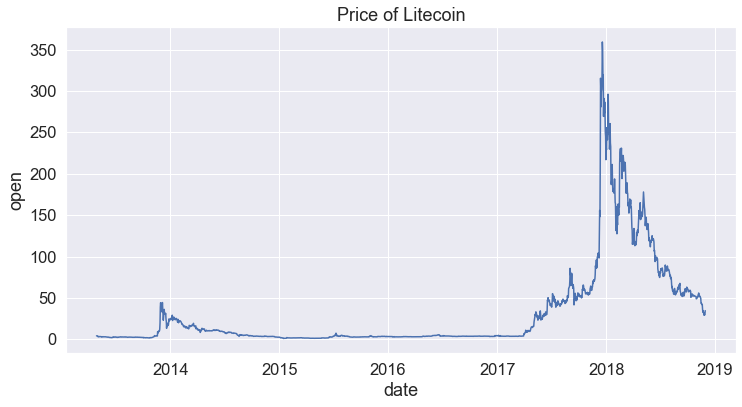

In [6]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid", font_scale=1.5)
sns.lineplot(x=df.index, y="open", data=df).set_title("Price of Litecoin")

In [7]:
#Data Preprocessing
data = df.iloc[:, 0]

In [8]:
hist = []
target = []
length = 90

for i in range(len(data)-length):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)


In [9]:
print(len(hist[0]))
print(len(hist))
print(len(target))

90
1952
1952


In [10]:
print(hist[0][89])
print(data[89])

2.98
2.98


In [11]:
print(hist[1][89])
print(data[90])
print(target[0])

2.9
2.9
2.9


In [12]:
print(type(hist), type(target))

<class 'list'> <class 'list'>


In [13]:
#convert list to array
hist = np.array(hist)
target = np.array(target)

In [14]:
print(type(hist), type(target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [15]:
hist.shape

(1952, 90)

In [16]:
target.shape

(1952,)

In [17]:
target = target.reshape(-1,1)
target.shape


(1952, 1)

In [18]:
#Normalize the values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
hist_scaled = sc.fit_transform(hist)
target_scaled = sc.fit_transform(target)

In [19]:
#Reshape the input
hist_scaled = hist_scaled.reshape((len(hist_scaled), length, 1))
print(hist_scaled.shape)

(1952, 90, 1)


In [20]:
#split the dataset
to_row=int(len(df)*0.8)
X_train = hist_scaled[:to_row,:,:]
X_test = hist_scaled[to_row:,:,:]

y_train = target_scaled[:to_row,:]
y_test = target_scaled[to_row:,:]

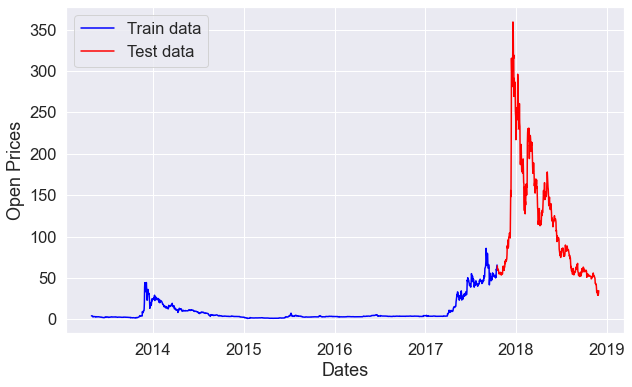

In [21]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(df[0:to_row]['open'],'blue',label='Train data')
plt.plot(df[to_row:]['open'],'red',label='Test data')
plt.legend()

In [22]:
#Building the neural network
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.Sequential()

model.add(layers.LSTM(units=32, return_sequences=True,
                  input_shape=(90,1), dropout=0.2))

model.add(layers.LSTM(units=32, return_sequences=True,
                  dropout=0.2))

model.add(layers.LSTM(units=32, dropout=0.2))

model.add(layers.Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 90, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 90, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
history = model.fit(X_train, y_train, epochs=5, batch_size=30,validation_split=0.3)

Epoch 1/5
39/39 [==============================] - 52s 424ms/step - loss: 1.5692e-04 - val_loss: 0.0123
Epoch 2/5
39/39 [==============================] - 11s 274ms/step - loss: 7.7227e-05 - val_loss: 0.0079
Epoch 3/5
39/39 [==============================] - 11s 286ms/step - loss: 7.9327e-05 - val_loss: 0.0056
Epoch 4/5
39/39 [==============================] - 11s 279ms/step - loss: 6.8400e-05 - val_loss: 0.0061
Epoch 5/5
39/39 [==============================] - 11s 286ms/step - loss: 6.3208e-05 - val_loss: 0.0058


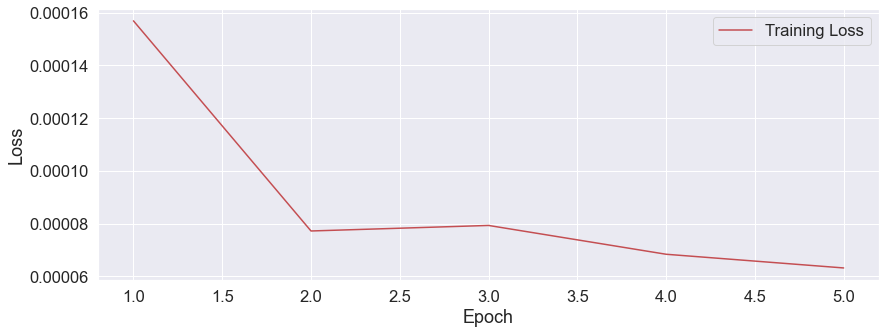

In [25]:
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(14,5))
plt.plot(epoch_count, loss, 'r')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

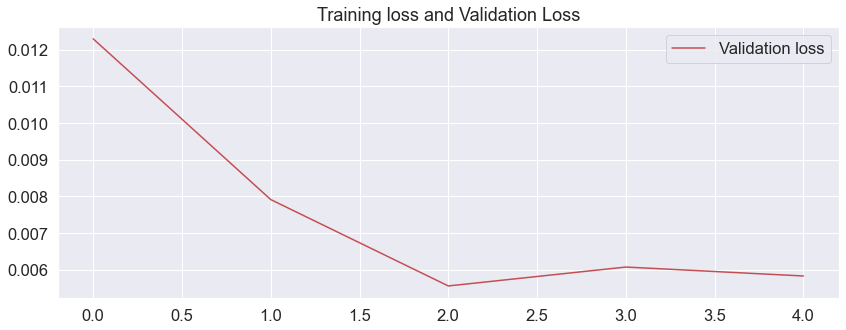

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize=(14,5))
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training loss and Validation Loss")
plt.legend()
plt.show()

In [27]:
pred = model.predict(X_test)
pred_transformed = sc.inverse_transform(pred)
y_test_transformed = sc.inverse_transform(y_test)

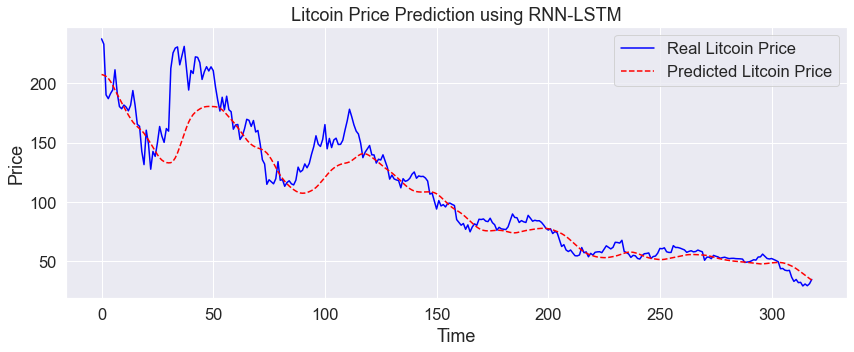

In [28]:
plt.figure(figsize=(14,5))
plt.plot(y_test_transformed, color = 'blue', label = 'Real Litcoin Price')
plt.plot(pred_transformed, color = 'red',linestyle='dashed', label = 'Predicted Litcoin Price')
plt.title('Litcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
#Mean absolute percentage error
mape=np.mean(np.abs(np.array(pred_transformed)- np.array(y_test_transformed))/np.abs(y_test_transformed))
print('MAPE of LSTM:' +str(mape))

MAPE of LSTM:0.09612433889930402


# ARIMA Algorithm

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
df

,open
date,
2013-04-28,4.30
2013-04-29,4.37
2013-04-30,4.40
2013-05-01,4.29
2013-05-02,3.78
...,...
2018-11-25,29.23
2018-11-26,30.87
2018-11-27,29.41


In [32]:
#split the dataset
to_row=int(len(df)*0.8)
training_data=list(df[0:to_row]['open'])
testing_data=list(df[to_row:]['open'])

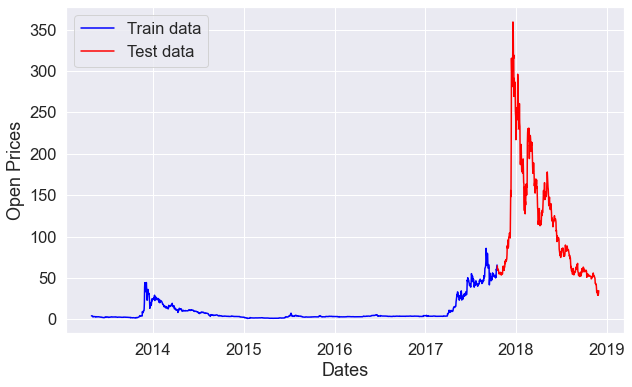

In [33]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(df[0:to_row]['open'],'blue',label='Train data')
plt.plot(df[to_row:]['open'],'red',label='Test data')
plt.legend()

In [34]:
model_predictions=[]
n_test_observatio=len(testing_data)

In [35]:
#Training ARIMA model
for i in range(n_test_observatio):
    model=ARIMA(training_data,order=(4,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=list(output[0])[0]
    model_predictions.append(yhat)
    actual_test_value=testing_data[i]
    training_data.append(actual_test_value)

C:\Users\rmano\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 2040
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -6211.888
Method:                       css-mle   S.D. of innovations              5.084
Date:                Wed, 30 Mar 2022   AIC                          12435.777
Time:                        14:30:45   BIC                          12469.501
Sample:                             1   HQIC                         12448.147
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0133      0.120      0.111      0.911      -0.221       0.248
ar.L1.D.y      0.0727      0.022      3.286      0.001       0.029       0.116
ar.L2.D.y     -0.0647      0.022     -2.928      0.003      -0.108      -0.021
ar.L3.D.y      0.0819      0.022      3.707      0.000       0.039       0.125
ar.L4.D.y     -0.0308      0.022     -1.392      0.164      -0.074       0.013
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0486           -1.7148j            2.0100           -0.3373
AR.2           -1.0486           +1.7148j            2.0100            0.3373
AR.3            2.3790           -1.5429j            2.8355           -0.0916
AR.4            2.3790           +1.5429j            2.8355            0.0916
-----------------------------------------------------------------------------
"""

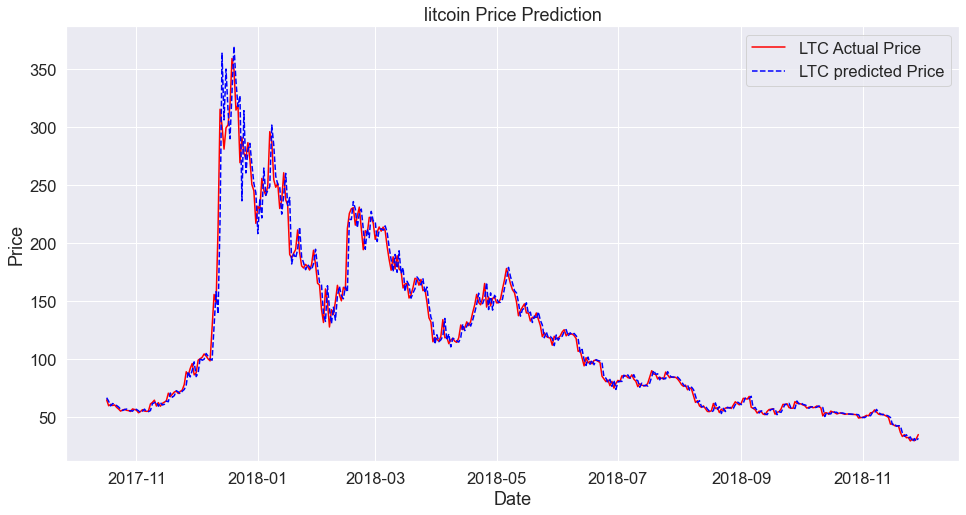

In [37]:
plt.figure(figsize=(16,8))
plt.grid(True)
date_range=df[to_row:].index
plt.plot(date_range,testing_data,color='red',label='LTC Actual Price')
plt.plot(date_range,model_predictions,color='blue',linestyle='dashed',label='LTC predicted Price')
plt.title('litcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [38]:
#Mean absolute percentage error
mape=np.mean(np.abs(np.array(model_predictions)- np.array(testing_data))/np.abs(testing_data))
print('MAPE of ARIMA:' +str(mape))

MAPE of ARIMA:0.04582978563066999


In [39]:
mape=np.mean(np.abs(np.array(pred_transformed)- np.array(y_test_transformed))/np.abs(y_test_transformed))
print('MAPE of LSTM:' +str(mape))

MAPE of LSTM:0.09612433889930402
